# Finding the right colors with ProcessOptimizer

This notebook is to test and showcase the use of the dataset color_pH.csv and the corresponding modelsystem in ProcessOptimizer

## Import the usual suspects and visualise the problem

We import the needed packages and illustrate the data source

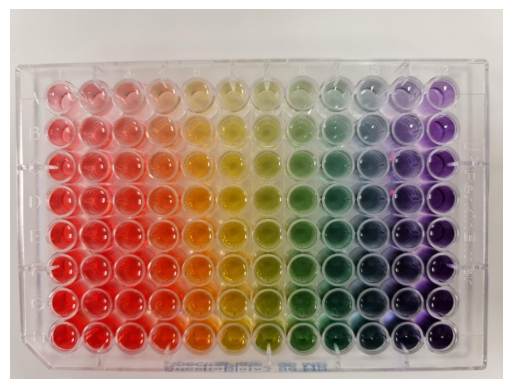

In [11]:
import matplotlib.pyplot as plt
import os
import ProcessOptimizer as po
from ProcessOptimizer.model_systems import color_pH_no_noise
from ProcessOptimizer.space import Integer

#load the neccesary data found in the python package to display the image called color_pH_image.jpg
#TODO: change the following line of code into something better

path = os.path.join(po.__path__[0] + '/model_systems/data/color_pH_image.jpg')
image = plt.imread(path)
plt.imshow(image)
plt.axis('off')
plt.show();

In the following example, we will use ProcessOptimizer to help us make a nice green color akin to the one found in 'F8' (sixth row, 8th column)

The data is generated by pipetting a known amount of a universal pH indicator (5-40uL) into each well. Rows are given 5uL, 10uL, 15uL, ... of indicator. All wells are thereafter filled to 40uL total with water.
To each column, known amounts of acidic buffer and basic buffer is added. Column 1 gets 170uL acid and 30uL (=85% acid). Column 2 gets 160uL acid and 40uL base. [...] Column 12 gets 60uL acid and 140uL base (=30% acid).

pH indicator: https://www.sigmaaldrich.com/DK/en/product/mm/109175 <br>
Acidic and basic buffer: https://pubs.acs.org/doi/10.1021/ed038p559 <br>

The given target, 'F8', is made by using a 50% acidic content with 30uL indicator.

## Setting up the optimizer instance

In [2]:
coordinates = [Integer(30, 85, name='percent_acid'),
             Integer(5, 40, name='Indicator'),
            ]

opt = po.Optimizer(dimensions=coordinates, n_initial_points=4)

In [3]:
for i in range(5):
    #Suggest the next experiment
    next_x = opt.ask()
    #Get the evaluated score if we were to do the experiment (in reality, it is a look-up in the data-table)
    f_val = color_pH_no_noise.get_score(next_x)
    #Perform the experiment and update the model
    opt.tell(next_x, f_val)

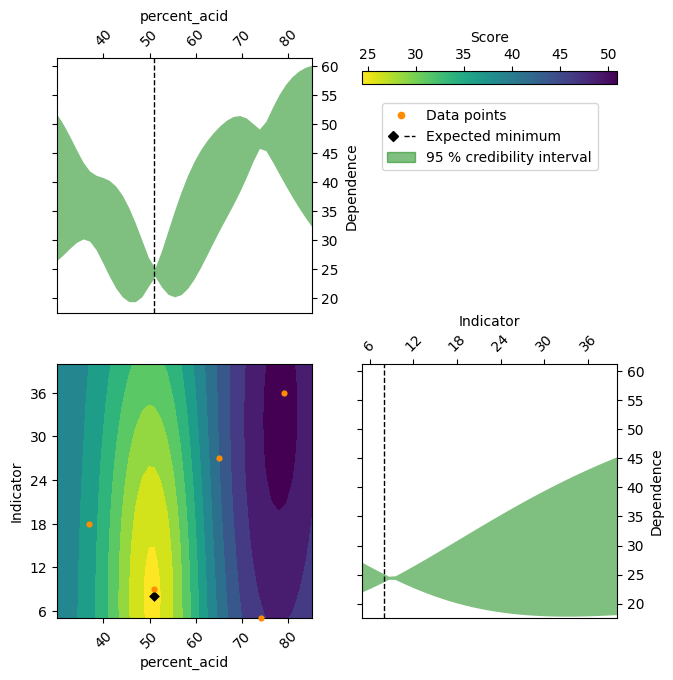

In [4]:
#plotting
result = opt.get_result()
po.plot_objective(result, usepartialdependence=False, pars = 'expected_minimum');

It would appear that the model has already cought onto the importance of hitting the correct proportion between the acidic and the basic buffer. The suggested minimum would correspond to a much less saturated color, though. <br>
Let's try to make some additional experiments to allow the model to catch up on the importance of the indicator.

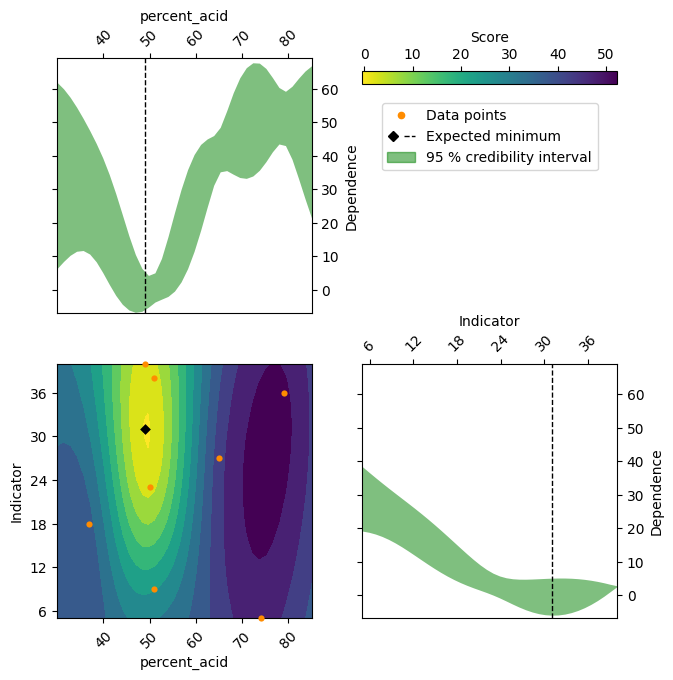

In [5]:
#Doing three more experiments and plooting the result
for i in range(3):
    #Suggest the next experiment
    next_x = opt.ask()
    #Get the evaluated score if we were to do the experiment (in reality, it is a look-up in the data-table)
    f_val = color_pH_no_noise.get_score(next_x)
    #Perform the experiment and update the model
    opt.tell(next_x, f_val)

result = opt.get_result()
po.plot_objective(result, usepartialdependence=False, pars = 'expected_minimum');

In [6]:
expected_minimum = po.expected_minimum(result, return_std=True)
print(expected_minimum)

([49, 31], [-0.4387245551483119, 2.8131912646152046])
